In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
%matplotlib inline
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['sepal_length','sepal_width','petal_length','petal_width']

y=pd.DataFrame(iris.target)
y.columns=['Targets']


Accuracy=  0.6533333333333333
Accuracy using GM= 0.6666666666666666
Accuracy using GM= 0.6666666666666666
Accuracy using GM= 0.9666666666666667
Accuracy=  0.9666666666666667
Accuracy using GM= 0.6333333333333333
Accuracy using GM= 0.9666666666666667
Accuracy using GM= 0.9666666666666667
Accuracy=  0.96
Accuracy using GM= 0.3333333333333333
Accuracy using GM= 0.6666666666666666
Accuracy using GM= 0.9666666666666667


<ipython-input-45-73e75931f561>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)
<ipython-input-45-73e75931f561>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)
<ipython-input-45-73e75931f561>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

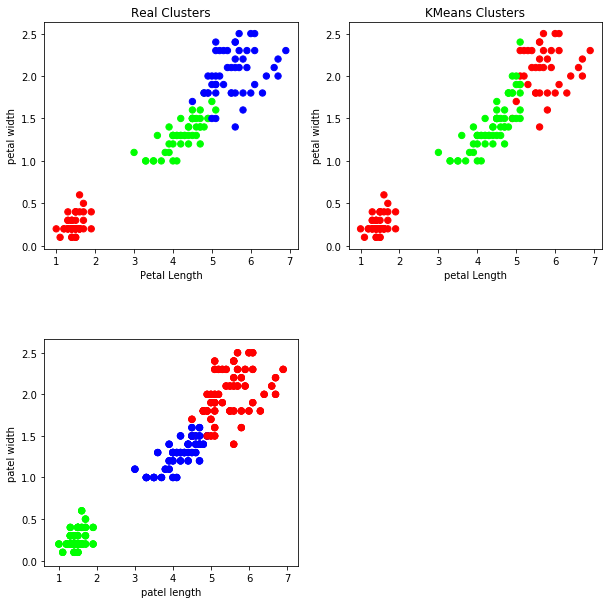

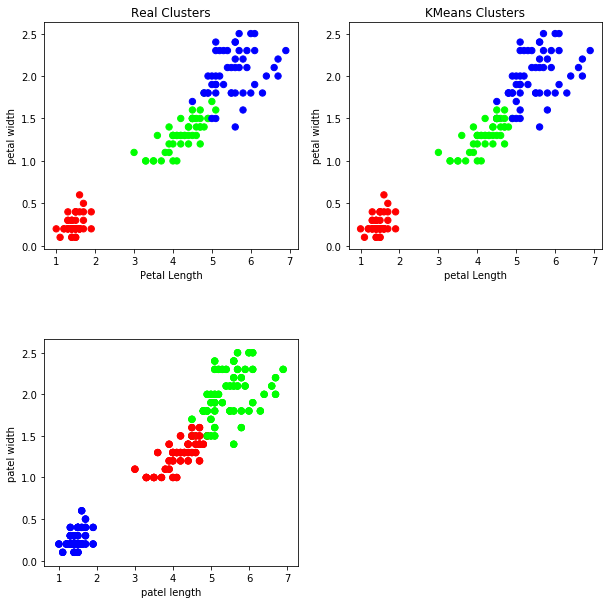

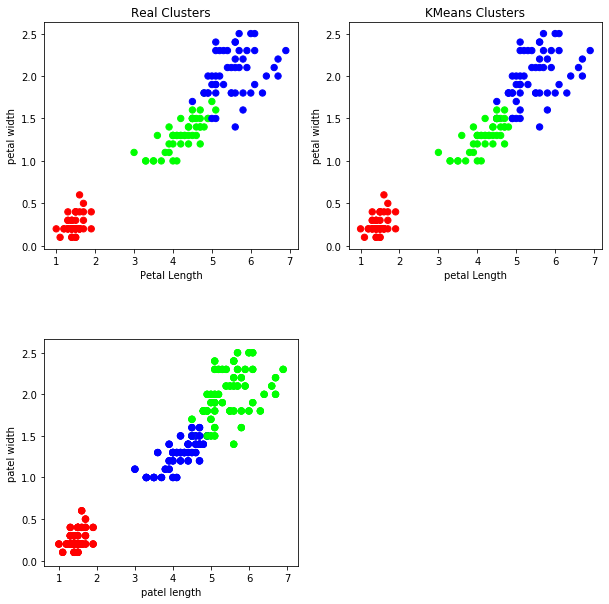

In [45]:
# build the Kmeans Model
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x)

from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(3):
    cat = (clusters== i)
    labels[cat] = mode(iris.target[cat])[0]
    acc = accuracy_score(iris.target, labels)
    print('Accuracy= ', acc)
    plt.figure(figsize=(10,10))
    colormap = np.array(['red','lime','blue'])
    
    #plot the original classification using petal feature
    
    plt.subplot(2,2,1)
    plt.scatter(x.petal_length,x.petal_width, c=colormap[y.Targets], s=40)
    plt.title('Real Clusters')
    plt.xlabel('Petal Length')
    plt.ylabel('petal width')
    # plot KMeans Models Classifincation
    plt.subplot(2,2,2)
    plt.scatter(x.petal_length,x.petal_width, c = colormap[labels], s=40)
    plt.title('KMeans Clusters')
    plt.xlabel('petal Length')
    plt.ylabel('petal width')
    
    
    # General EM for GM
    from sklearn import preprocessing
    
    # transform data such that the distribution mean=0 and std=1
    scaler =preprocessing.StandardScaler()
    scaler.fit(x)
    scaled_x =scaler.transform(x)
    xs = pd.DataFrame(scaled_x, columns = x.columns)
    from sklearn.mixture import GaussianMixture
    
    gm = GaussianMixture(n_components=3)
    
    gm_y =gm.fit_predict(xs)
    
    labels = np.zeros_like(clusters)
    
    for i in range(3):
        cat = (gm_y== i)
        labels[cat] =mode(iris.target[cat])[0]
        acc =accuracy_score(iris.target,labels)
        print("Accuracy using GM=", acc)
        plt.subplot(2,2,3)
        plt.scatter(x.petal_length,x.petal_width, c= colormap[gm_y], s= 40)
        plt.subplots_adjust(hspace=0.4)
        plt.xlabel('patel length')
        plt.ylabel('patel width')
        
        
    
    

In [46]:
# General EM for GM
